<a href="https://colab.research.google.com/github/Ram2005-ui/us_accidents_data_analysis/blob/main/Day_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Sythetic dataset with categorical and duplicated rows
data = {
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Houston', 'Los Angeles', 'Boston', 'Boston', 'Chicago'],
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy'],
    'Severity': [3, 2, 3, 1, 4, 2, 3, 3, 1],
    'Accidents': [100, 150, 100, 80, 90, 150, 60, 60, 80]
}

df = pd.DataFrame(data)
df.head()

,City,Weather,Severity,Accidents
0,New York,Sunny,3,100
1,Los Angeles,Rainy,2,150
2,New York,Sunny,3,100
3,Chicago,Cloudy,1,80
4,Houston,Sunny,4,90


In [2]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.head()

,City,Weather,Severity,Accidents
0,New York,Sunny,3,100
1,Los Angeles,Rainy,2,150
3,Chicago,Cloudy,1,80
4,Houston,Sunny,4,90
6,Boston,Rainy,3,60


In [3]:
df

,City,Weather,Severity,Accidents
0,New York,Sunny,3,100
1,Los Angeles,Rainy,2,150
2,New York,Sunny,3,100
3,Chicago,Cloudy,1,80
4,Houston,Sunny,4,90
5,Los Angeles,Rainy,2,150
6,Boston,Rainy,3,60
7,Boston,Sunny,3,60
8,Chicago,Cloudy,1,80


In [4]:
df_no_duplicates['City_Encoded'] = df_no_duplicates['City'].astype('category').cat.codes
df_no_duplicates

/tmp/ipython-input-320121151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['City_Encoded'] = df_no_duplicates['City'].astype('category').cat.codes


,City,Weather,Severity,Accidents,City_Encoded
0,New York,Sunny,3,100,4
1,Los Angeles,Rainy,2,150,3
3,Chicago,Cloudy,1,80,1
4,Houston,Sunny,4,90,2
6,Boston,Rainy,3,60,0
7,Boston,Sunny,3,60,0


In [5]:
df_onehot = pd.get_dummies(df_no_duplicates, columns=['Weather'])
df_onehot

,City,Severity,Accidents,City_Encoded,Weather_Cloudy,Weather_Rainy,Weather_Sunny
0,New York,3,100,4,False,False,True
1,Los Angeles,2,150,3,False,True,False
3,Chicago,1,80,1,True,False,False
4,Houston,4,90,2,False,False,True
6,Boston,3,60,0,False,True,False
7,Boston,3,60,0,False,False,True


In [6]:
Q1 = df['Accidents'].quantile(0.25)
Q3 = df['Accidents'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Accidents'] < lower_bound) | (df['Accidents'] > upper_bound)]

# Option 1: Remove outliers
df_no_outliers = df_no_duplicates[(df_no_duplicates['Accidents'] >= lower_bound) & (df_no_duplicates['Accidents'] <= upper_bound)]
print("\nDataset after removing outliers:")
print(df_no_outliers)

# Option 2: Cap outliers (winsorizing)
df_capped = df_no_duplicates.copy()
df_capped['Accidents'] = np.where(df_capped['Accidents'] > upper_bound, upper_bound,
                                  np.where(df_capped['Accidents'] < lower_bound, lower_bound, df_capped['Accidents']))


print("\nDataset after capping outliers:")
print(df_capped)


Dataset after removing outliers:
       City Weather  Severity  Accidents  City_Encoded
0  New York   Sunny         3        100             4
3   Chicago  Cloudy         1         80             1
4   Houston   Sunny         4         90             2
6    Boston   Rainy         3         60             0
7    Boston   Sunny         3         60             0

Dataset after capping outliers:
          City Weather  Severity  Accidents  City_Encoded
0     New York   Sunny         3      100.0             4
1  Los Angeles   Rainy         2      130.0             3
3      Chicago  Cloudy         1       80.0             1
4      Houston   Sunny         4       90.0             2
6       Boston   Rainy         3       60.0             0
7       Boston   Sunny         3       60.0             0


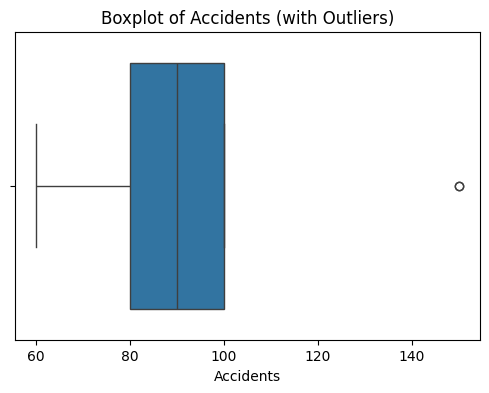

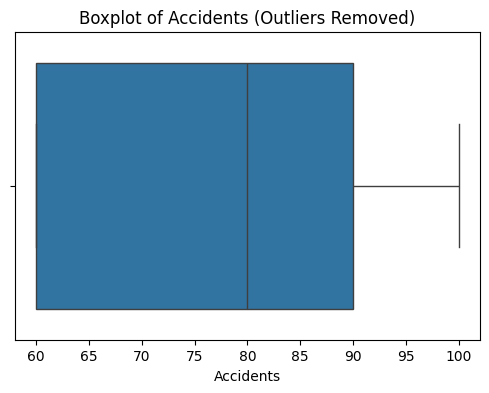

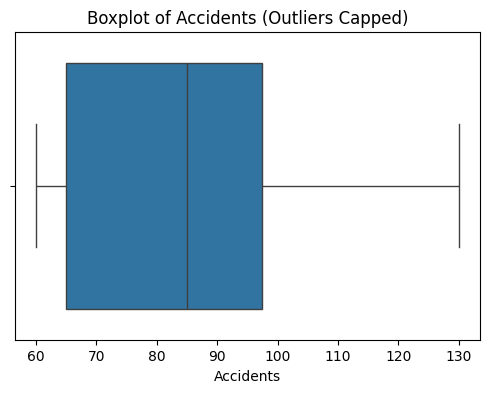

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original dataset with outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Accidents'])
plt.title("Boxplot of Accidents (with Outliers)")
plt.show()

# Dataset after removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_no_outliers['Accidents'])
plt.title("Boxplot of Accidents (Outliers Removed)")
plt.show()

# Dataset after capping outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_capped['Accidents'])
plt.title("Boxplot of Accidents (Outliers Capped)")
plt.show()
